# Predicton Protein Structure From Amino Acid Sequence using AlphaFold - Tutorial

#### Written by Annie Needs

**Motivations:** Proteins are micromolecules made up of a sequence of chemical moieties (i.e., amino acids) which dictate complex folding patterns. While the structure of a protein can be determined through experimental methods such as cryo-electron microscopy, x-ray crystallography, and NMR spectroscopy, these methods are expensive, time consuming, and extremely challenging. Thus, it is often not feasible to experimentally determine protein structure.


However, protein structure plays a significant role in the protein function and can elucidate critical information about binding interactions, stability, and overall function. This is why the life sciences were ecstatic in 2020 when Google DeepMind released AlphaFold2, an AI network which predicts protein structure from solely the amino acid sequence. While limited in ability to predict multiple conformations or multiple domains, the high accuracy and rapid completion of AlphaFold2’s predictions have become a staple in protein research, especially drug discovery. 


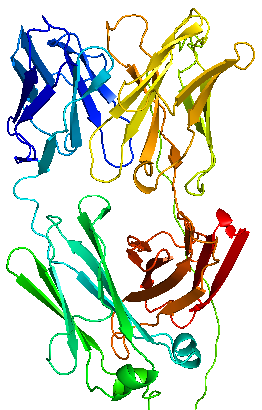

*Figure 1. The structure of an antibody fragment predicted by AlphaFold. The colors are for aethetic purposes.*

### This tutorial will walk through the steps fo running AlphaFold for multiple protein sequences on the MSU HPCC

**Step 1:** On the HPCC, make a working directory within your personal **scratch folder**


**Step 2:** Collect your protein amino acid sequences within a .csv file and save the .csv in the working directory.

In [4]:
import csv
import pandas as pd

seqs = 'sequences.csv'

df = pd.read_csv(seqs)
df.head()

ProteinName                                  AminoAcidSequence
0       huNax  EIVMTQTPATLSVSAGERVTITCKASQSVSNDVTWYQQKPGQAPRL...
1   NMclone54  DIVMTQAVFSVSVTPGESVSIPCRSSRSLLNSIGDTYLYWFLQRPG...
2    OMclone1  DVLMTQTPLSLPVSLGDQASISCRSSQSIVHSNGNTYLEWYLQKPG...

**Step 3:** Make a new directory in the working directory to store a fasta file for each sequence.

**Step 4:** Use the following python script to save each sequence as their own .fasta file within the fasta_files directory.  Each sequence will be named using a sequential numerical ID (e.g., seq_1, seq_2, etc). Add a column to the .csv file to document the protein associated with the numerical IDs.

In [38]:
with open(seqs, 'r') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # The first row is a header

    for i, (protein_name, protein_sequence) in enumerate(reader, 1):
        fasta_filename = f"fasta_files/seq_{i}.fasta"
        with open(fasta_filename, 'w') as fasta_file:
            fasta_file.write(f">seq_{i}_{protein_name}\n{protein_sequence}\n")


# update the .csv with the NumIDs
df['NumID'] = ['seq_'+str(i+1) for i in range(len(df))]
df.to_csv(seqs, index=False)

**Step 5:** Upload the following template .sb file to the working directory. This .sb file sets the parameters and calls the AlphaFold Software from the /mnt/research/common-data/ directory 

**Step 6:** Edit the template .sb file: 

- Rename the .sb file to reflect your job_name. 

- The array in **line 9** defines how many sequences from the .fasta file to evaluate. 

- **Line 11** instructs python to ignore module libraries in .local to ensure AlphaFold runs on its own modules. 

- Be sure to update the output directory in **line 24** and the fasta path in **line 25** to be your own scratch files.

- The run time can be reduced over time as needed. It is best to keep the run time high if running a sequence for the first time.

**Step 7:** Make an output directory within the working directory

**Step 8:** Navigate to the working directory & run the following commands to submit the .sb file using the sbatch command. The first two commands will instruct python to ignore the local modules and to instead use the modules in the AlphaFold environemnt. 

###### References and curious links

Jumper, J., Evans, R., Pritzel, A. et al. Highly accurate protein structure prediction with AlphaFold. Nature 596, 583–589 (2021). https://doi.org/10.1038/s41586-021-03819-2

Callaway, E. 'It will change everything': DeepMind's AI makes gigantic lap in solving protien structure. Nature 588, 203-204 (2020). doi: https://doi.org/10.1038/d41586-020-03348-4

AlphaFold Protein Structure Database. https://alphafold.ebi.ac.uk/

Human Naxitamab antiobdy sequence. https://www.kegg.jp/entry/D11416